<a href="https://colab.research.google.com/github/mggm1982/-CRIMSON-CARE-BLOOD-BANK-MANAGEMENT-SYSTEM-/blob/main/FINAL_CODE_AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data preprocessing

In [ ]:

# Data upload & cleaning cell for Google Colab
from google.colab import files
import pandas as pd
import numpy as np

# Upload dataset from your computer
uploaded = files.upload()

# Automatically read your dataset (adjust filename if needed)
csv_path = "aqi_health_weather.csv"
df = pd.read_csv(csv_path)

# Parse datetime
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Convert object columns to numeric safely
for col in df.columns:
    if col not in ["city", "date"] and df[col].dtype == "object":
        df[col + "_num"] = pd.to_numeric(df[col], errors="coerce")

# Fill missing values
df = df.fillna(method="ffill").fillna(method="bfill")

print(" Data cleaned successfully. Shape:", df.shape)
df.head()


Saving aqi_health_weather.csv to aqi_health_weather (1).csv
 Data cleaned successfully. Shape: (2920, 17)


,city,date,aqi,pm25,pm10,no2,so2,co,o3,temp_c,humidity_pct,wind_speed_m_s,rainfall_mm,asthma_cases,copd_cases,ari_cases,total_respiratory_cases
0,Delhi,2024-01-01,126,153.11,168.37,78.22,8.84,1.095,34.34,25.92,51.3,2.02,0.0,1,4,1,6
1,Delhi,2024-01-02,126,128.06,192.52,72.24,7.88,1.365,30.58,25.51,49.5,2.26,0.0,0,1,4,5
2,Delhi,2024-01-03,126,146.38,152.69,70.63,10.66,1.395,35.16,23.82,52.5,1.97,0.0,3,1,1,5
3,Delhi,2024-01-04,134,133.52,171.17,81.52,8.96,1.038,35.16,28.03,46.3,2.33,0.0,7,0,2,9
4,Delhi,2024-01-05,135,112.32,170.21,72.38,6.16,1.195,38.66,26.54,51.4,1.67,0.0,6,3,0,9


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('aqi_health_weather.csv')

In [ ]:
print(df.head())

    city        date  aqi    pm25    pm10    no2    so2     co     o3  temp_c  \
0  Delhi  2024-01-01  126  153.11  168.37  78.22   8.84  1.095  34.34   25.92   
1  Delhi  2024-01-02  126  128.06  192.52  72.24   7.88  1.365  30.58   25.51   
2  Delhi  2024-01-03  126  146.38  152.69  70.63  10.66  1.395  35.16   23.82   
3  Delhi  2024-01-04  134  133.52  171.17  81.52   8.96  1.038  35.16   28.03   
4  Delhi  2024-01-05  135  112.32  170.21  72.38   6.16  1.195  38.66   26.54   

   humidity_pct  wind_speed_m_s  rainfall_mm  asthma_cases  copd_cases  \
0          51.3            2.02          0.0             1           4   
1          49.5            2.26          0.0             0           1   
2          52.5            1.97          0.0             3           1   
3          46.3            2.33          0.0             7           0   
4          51.4            1.67          0.0             6           3   

   ari_cases  total_respiratory_cases  
0          1                

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     2920 non-null   object 
 1   date                     2920 non-null   object 
 2   aqi                      2920 non-null   int64  
 3   pm25                     2920 non-null   float64
 4   pm10                     2920 non-null   float64
 5   no2                      2920 non-null   float64
 6   so2                      2920 non-null   float64
 7   co                       2920 non-null   float64
 8   o3                       2920 non-null   float64
 9   temp_c                   2920 non-null   float64
 10  humidity_pct             2920 non-null   float64
 11  wind_speed_m_s           2920 non-null   float64
 12  rainfall_mm              2920 non-null   float64
 13  asthma_cases             2920 non-null   int64  
 14  copd_cases              

In [ ]:
df.isnull().sum()

,0
city,0
date,0
aqi,0
pm25,0
pm10,0
no2,0
so2,0
co,0
o3,0
temp_c,0


In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert date column
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check missing values
print(df.isnull().sum())


city                       0
date                       0
aqi                        0
pm25                       0
pm10                       0
no2                        0
so2                        0
co                         0
o3                         0
temp_c                     0
humidity_pct               0
wind_speed_m_s             0
rainfall_mm                0
asthma_cases               0
copd_cases                 0
ari_cases                  0
total_respiratory_cases    0
dtype: int64


In [ ]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek

df['aqi_temp_ratio'] = df['aqi'] / (df['temp_c'] + 1)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

In [ ]:
scaler = StandardScaler()
df[['aqi', 'temp_c', 'humidity_pct', 'wind_speed_m_s', 'total_respiratory_cases']] = scaler.fit_transform(
    df[['aqi', 'temp_c', 'humidity_pct', 'wind_speed_m_s', 'total_respiratory_cases']]
)


In [ ]:
df.to_csv("cleaned_aqi_health_weather.csv", index=False)
print("Cleaned dataset saved as 'cleaned_aqi_health_weather.csv'")


Cleaned dataset saved as 'cleaned_aqi_health_weather.csv'


In [ ]:
print(df.columns)

Index(['city', 'date', 'aqi', 'pm25', 'pm10', 'no2', 'so2', 'co', 'o3',
       'temp_c', 'humidity_pct', 'wind_speed_m_s', 'rainfall_mm',
       'asthma_cases', 'copd_cases', 'ari_cases', 'total_respiratory_cases',
       'month', 'day', 'dayofweek', 'aqi_temp_ratio'],
      dtype='object')


In [ ]:
df.head()

,city,date,aqi,pm25,pm10,no2,so2,co,o3,temp_c,...,wind_speed_m_s,rainfall_mm,asthma_cases,copd_cases,ari_cases,total_respiratory_cases,month,day,dayofweek,aqi_temp_ratio
0,Delhi,2024-01-01,2.010234,153.11,168.37,78.22,8.84,1.095,34.34,-0.157460,...,-0.199918,0.0,1,4,1,-0.435633,1,1,0,4.680535
1,Delhi,2024-01-02,2.010234,128.06,192.52,72.24,7.88,1.365,30.58,-0.234972,...,0.033400,0.0,0,1,4,-0.647007,1,2,1,4.752923
2,Delhi,2024-01-03,2.010234,146.38,152.69,70.63,10.66,1.395,35.16,-0.554470,...,-0.248526,0.0,3,1,1,-0.647007,1,3,2,5.076551
3,Delhi,2024-01-04,2.274201,133.52,171.17,81.52,8.96,1.038,35.16,0.241440,...,0.101451,0.0,7,0,2,0.198489,1,4,3,4.615915
4,Delhi,2024-01-05,2.307197,112.32,170.21,72.38,6.16,1.195,38.66,-0.040248,...,-0.540174,0.0,6,3,0,0.198489,1,5,4,4.901961


#EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf, ccf


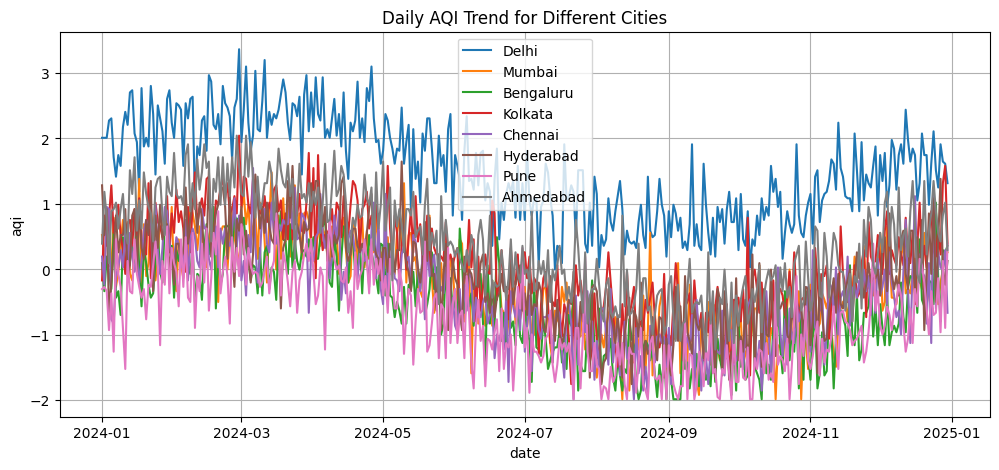

In [ ]:
# 1. Time Trend Analysis

plt.figure(figsize=(12, 5))
for city in df['city'].unique():
    city_data = df[df['city'] == city]
    plt.plot(city_data['date'], city_data['aqi'], label=city)
plt.title('Daily AQI Trend for Different Cities')
plt.xlabel('date')
plt.ylabel('aqi')
plt.legend()
plt.grid(True)
plt.show()

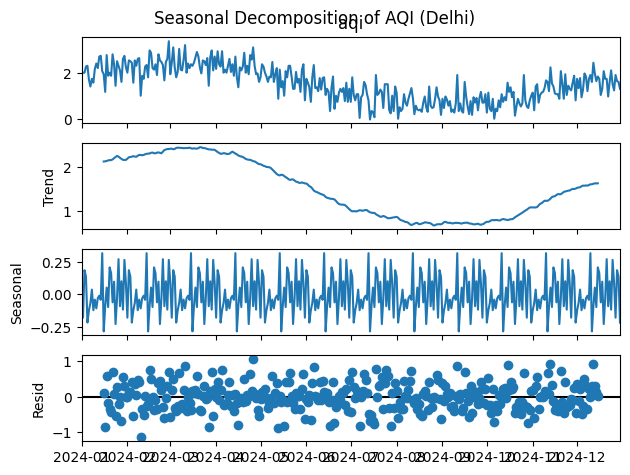

In [ ]:
# 2. Seasonal Decomposition (Example: Delhi AQI)
delhi = df[df['city'] == 'Delhi'].set_index('date')
result = seasonal_decompose(delhi['aqi'], model='additive', period=30)  # monthly pattern
result.plot()
plt.suptitle('Seasonal Decomposition of AQI (Delhi)')
plt.show()

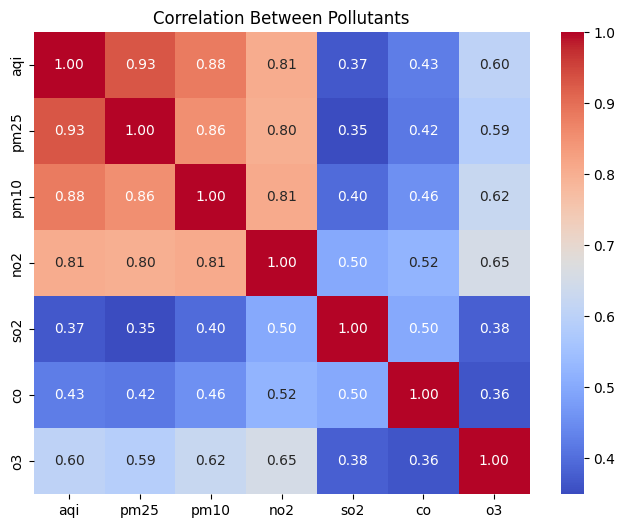

In [ ]:
# 3. Pollutant Correlation Matrix
pollutants = ['aqi', 'pm25', 'pm10', 'no2', 'so2', 'co', 'o3']
plt.figure(figsize=(8,6))
sns.heatmap(df[pollutants].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Pollutants')
plt.show()

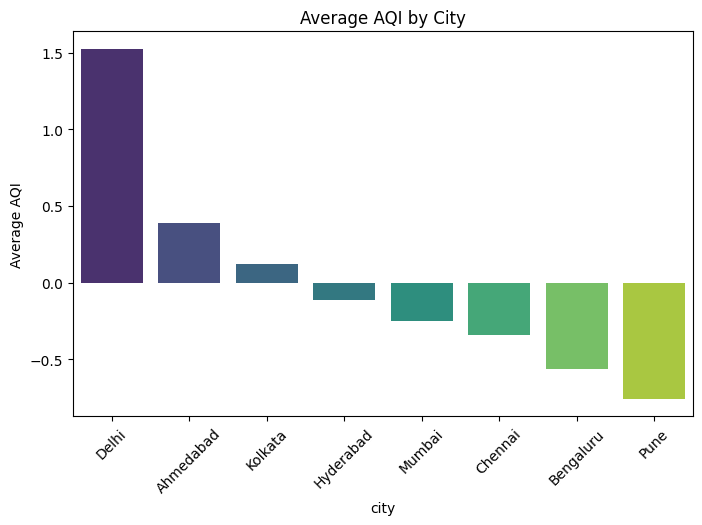

In [ ]:
# 4. Average AQI by City (Station-Level)
city_avg = df.groupby('city')['aqi'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=city_avg.index, y=city_avg.values, palette='viridis')
plt.title('Average AQI by City')
plt.xticks(rotation=45)
plt.ylabel('Average AQI')
plt.show()

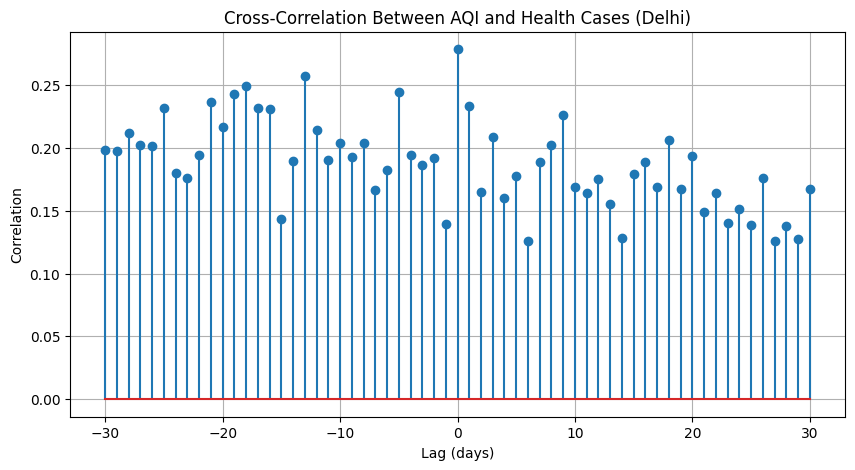

In [ ]:
# 5. Cross-Correlation: AQI vs Health Cases
city = 'Delhi'
city_data = df[df['city'] == city].set_index('date')

# Normalize for correlation
aqi_series = (city_data['aqi'] - city_data['aqi'].mean()) / city_data['aqi'].std()
health_series = (city_data['total_respiratory_cases'] - city_data['total_respiratory_cases'].mean()) / city_data['total_respiratory_cases'].std()

lags = np.arange(-30, 31)
cross_corr = [np.corrcoef(aqi_series.shift(lag).dropna(), health_series.iloc[max(0, lag):len(health_series)+min(0, lag)])[0,1]
               for lag in lags]

plt.figure(figsize=(10,5))
plt.stem(lags, cross_corr)
plt.title(f'Cross-Correlation Between AQI and Health Cases ({city})')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

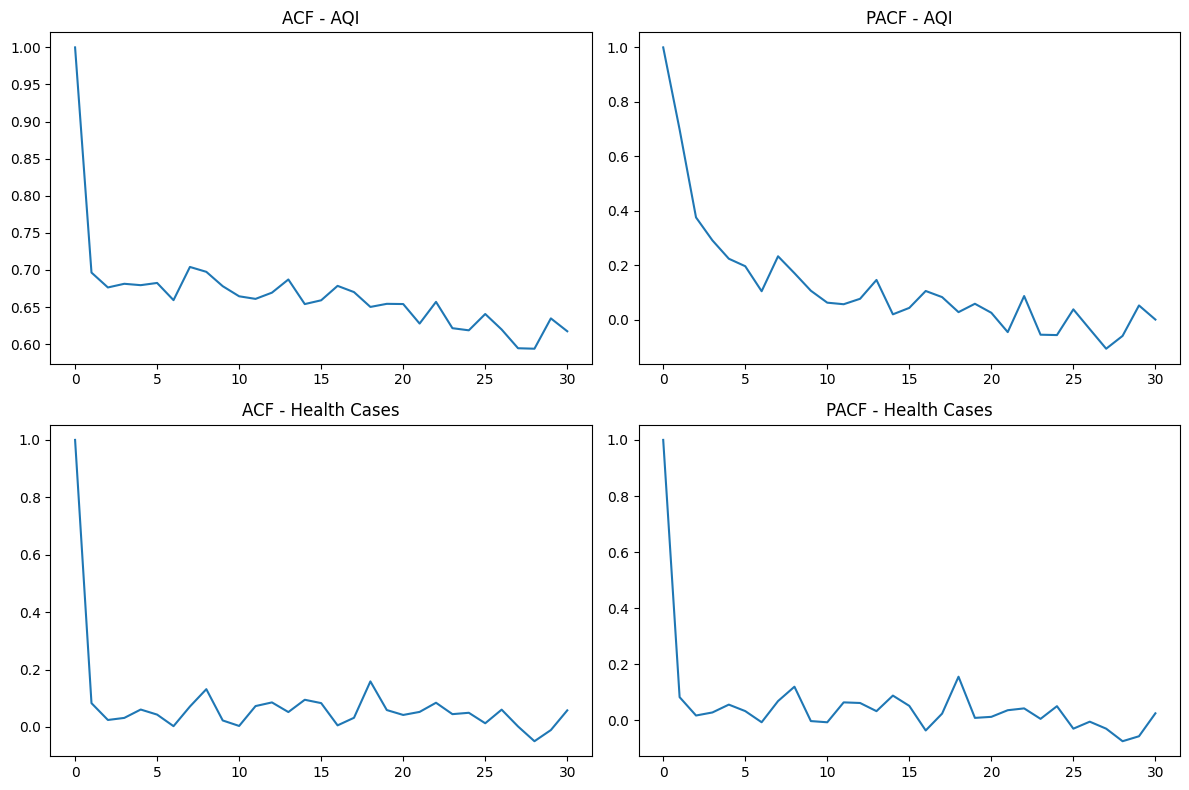

In [ ]:
#  6. ACF / PACF of AQI and Health Cases
fig, axes = plt.subplots(2, 2, figsize=(12,8))
sns.lineplot(x=range(len(acf(aqi_series, nlags=30))), y=acf(aqi_series, nlags=30), ax=axes[0,0])
axes[0,0].set_title('ACF - AQI')
sns.lineplot(x=range(len(pacf(aqi_series, nlags=30))), y=pacf(aqi_series, nlags=30), ax=axes[0,1])
axes[0,1].set_title('PACF - AQI')

sns.lineplot(x=range(len(acf(health_series, nlags=30))), y=acf(health_series, nlags=30), ax=axes[1,0])
axes[1,0].set_title('ACF - Health Cases')
sns.lineplot(x=range(len(pacf(health_series, nlags=30))), y=pacf(health_series, nlags=30), ax=axes[1,1])
axes[1,1].set_title('PACF - Health Cases')

plt.tight_layout()
plt.show()


#Time series SARIMAX (DROP THIS BECAUSE MORE ERROR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [ ]:
# Normalize column names
df.columns = df.columns.str.strip().str.lower()

# Convert to datetime
df['date'] = pd.to_datetime(df['date'])

city = 'Delhi'
city_data = df[df['city'] == city].set_index('date')
target_col = 'aqi'
exog_features = ['temp_c', 'humidity_pct', 'wind_speed_m_s', 'rainfall_mm']

In [ ]:
# 2️ Check Stationarity (ADF Test)
result = adfuller(city_data[target_col].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] > 0.05:
    print(" Series is non-stationary — differencing needed.")
else:
    print(" Series is stationary — no differencing needed.")

ADF Statistic: -1.147948406774361
p-value: 0.6955770485556921
 Series is non-stationary — differencing needed.


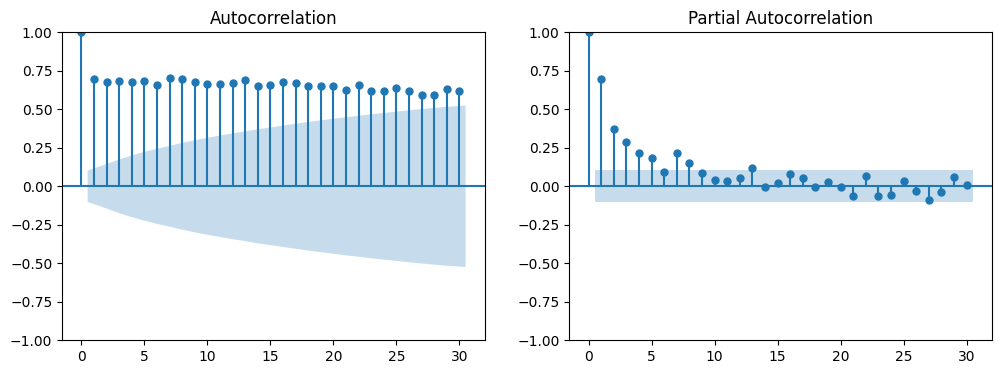

In [ ]:
# 3️ Plot ACF and PACF (for p,q identification)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(city_data[target_col].dropna(), lags=30, ax=axes[0])
plot_pacf(city_data[target_col].dropna(), lags=30, ax=axes[1])
plt.show()

In [ ]:
# 4️ Train-Test Split
'''train_size = int(len(city_data) * 0.8)
train = city_data.iloc[:train_size]
test = city_data.iloc[train_size:]'''

'train_size = int(len(city_data) * 0.8)\ntrain = city_data.iloc[:train_size]\ntest = city_data.iloc[train_size:]'

In [ ]:
# 5️ Build SARIMAX Model
train_size = int(len(city_data) * 0.8)
train = city_data.iloc[:train_size]
test = city_data.iloc[train_size:]

model = SARIMAX(
    train[target_col],
    exog=train[exog_features],
    order=(1,1,1),                              # (p,d,q)
    seasonal_order=(1,1,1,7),                  # (P,D,Q,s) weekly seasonality
    enforce_stationarity=False,
    enforce_invertibility=False
)

model_fit = model.fit(disp=False)
print(model_fit.summary())


                                     SARIMAX Results                                     
Dep. Variable:                               aqi   No. Observations:                  292
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -175.725
Date:                           Fri, 31 Oct 2025   AIC                            369.449
Time:                                   08:53:06   BIC                            402.000
Sample:                               01-01-2024   HQIC                           382.513
                                    - 10-18-2024                                         
Covariance Type:                             opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
temp_c             0.0173      0.097      0.178      0.859      -0.173       0.207
humidity_pct       0.0781      

In [ ]:
# 6️ Forecast on Test Data
forecast = model_fit.get_forecast(steps=len(test), exog=test[exog_features])
pred = forecast.predicted_mean
conf_int = forecast.conf_int()

In [ ]:
# 7️ Evaluation Metrics
mae = mean_absolute_error(test[target_col], pred)
rmse = math.sqrt(mean_squared_error(test[target_col], pred))
mape = np.mean(np.abs((test[target_col] - pred) / test[target_col])) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 0.68
RMSE: 0.80
MAPE: 50.08%


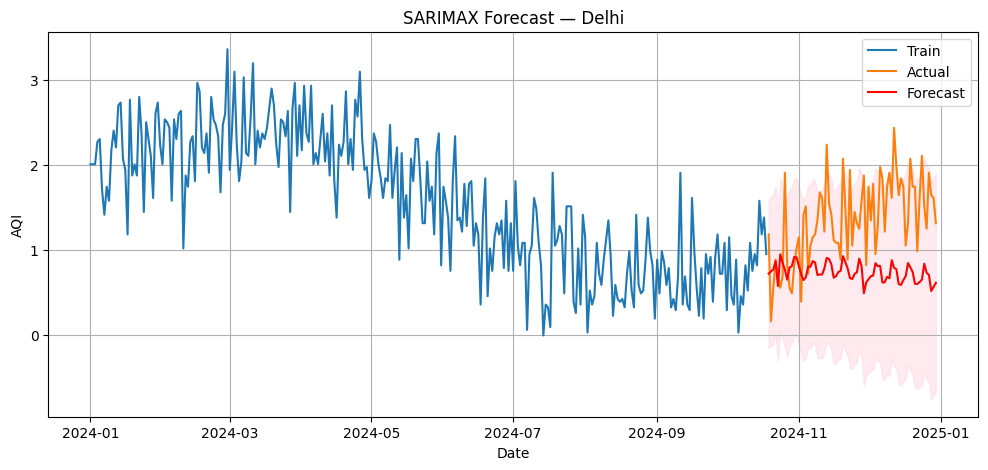

In [ ]:
# 8️ Visualization
plt.figure(figsize=(12, 5))
plt.plot(train.index, train[target_col], label='Train')
plt.plot(test.index, test[target_col], label='Actual')
plt.plot(test.index, pred, label='Forecast', color='red')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title(f'SARIMAX Forecast — {city}')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 9️ Future AQI Forecast (Next 30 Days)

#OPTIONAL

# Define how many future days to forecast
future_steps = 30

# use last known values or mean of training exog
future_exog = pd.DataFrame(
    [train[exog_features].iloc[-1].values] * future_steps,
    columns=exog_features
)

# Create future date index (starting after last date in dataset)
last_date = city_data.index.max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps, freq='D')

# Forecast future AQI
future_forecast = model_fit.get_forecast(steps=future_steps, exog=future_exog)
future_pred = future_forecast.predicted_mean
future_conf_int = future_forecast.conf_int()

# Combine results into a single DataFrame
future_results = pd.DataFrame({
    'Date': future_dates,
    'Forecasted_AQI': future_pred.values,
    'Lower_CI': future_conf_int.iloc[:, 0].values,
    'Upper_CI': future_conf_int.iloc[:, 1].values
})

# Display forecasted values
print("\n Future 30-Day AQI Forecast:")
print(future_results.head(10))



 Future 30-Day AQI Forecast:
        Date  Forecasted_AQI  Lower_CI  Upper_CI
0 2024-12-31        0.734949 -0.137269  1.607167
1 2025-01-01        0.727588 -0.147839  1.603014
2 2025-01-02        0.775986 -0.102789  1.654760
3 2025-01-03        0.852759 -0.029369  1.734886
4 2025-01-04        0.958556  0.073088  1.844024
5 2025-01-05        0.923515  0.034719  1.812312
6 2025-01-06        0.850795 -0.041317  1.742907
7 2025-01-07        0.711192 -0.197293  1.619678
8 2025-01-08        0.690675 -0.221777  1.603127
9 2025-01-09        0.751446 -0.164965  1.667858


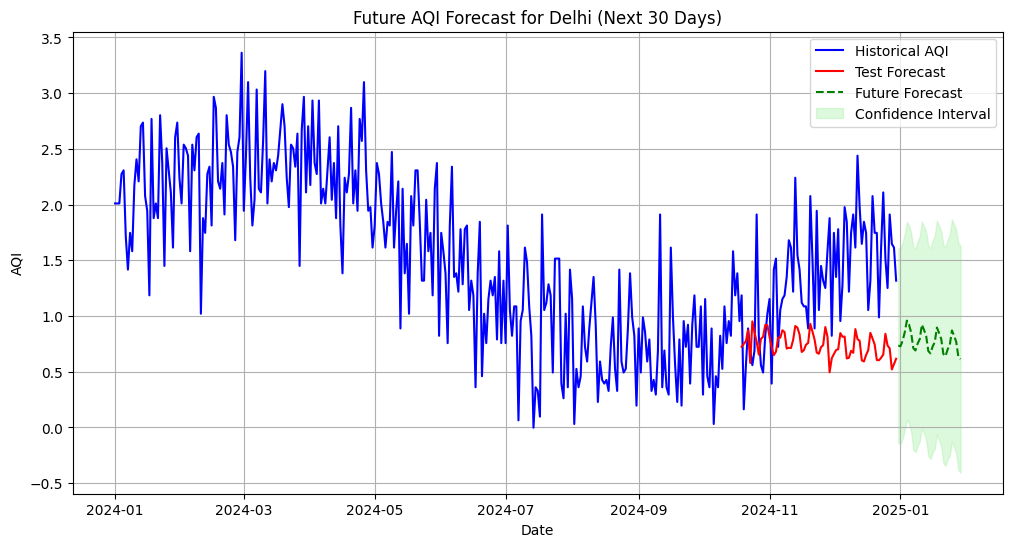

In [ ]:
# 10 Plot Future Forecast
plt.figure(figsize=(12, 6))

# Plot past actual + predicted test
plt.plot(city_data.index, city_data[target_col], label='Historical AQI', color='blue')
plt.plot(test.index, pred, label='Test Forecast', color='red')

# Plot future forecast
plt.plot(future_dates, future_pred, label='Future Forecast', color='green', linestyle='--')
plt.fill_between(future_dates, future_conf_int.iloc[:, 0], future_conf_int.iloc[:, 1],
                 color='lightgreen', alpha=0.3, label='Confidence Interval')

plt.title(f"Future AQI Forecast for {city} (Next {future_steps} Days)")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.show()


#lstm

In [ ]:
"""
LSTM Time-Series Forecasting Pipeline (multivariate)
- Input: CSV with columns ['date','city','aqi','pm25','pm10', 'temperature', 'humidity', ...]
- Use per-city data (example uses city='Delhi')
- Builds sequences of LOOKBACK days to predict next HORIZON days (default HORIZON=1)
- Provides MC-dropout uncertainty and ensemble option
"""

import os
import random
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, backend as K

In [ ]:
# Config
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

DATA_PATH = 'aqi_health_weather.csv'
CITY = "Delhi"
LOOKBACK = 30       # use past 30 days
HORIZON = 1         # predict 1 day ahead (set >1 for multi-step)
BATCH_SIZE = 32
EPOCHS = 100
VALIDATION_SPLIT = 0.15
MC_DROPOUT_PASSES = 50  # for uncertainty estimation
ENSEMBLE_SIZE = 3       # if using ensemble

FEATURES = [
    "aqi", "pm25", "pm10", "no2", "so2", "co", "o3",
     'temp_c', 'humidity_pct', 'wind_speed_m_s', 'rainfall_mm'
]
TARGET = "aqi"   # predicting AQI; for health change target to 'total_respiratory_cases'

In [ ]:
print(df.columns)

Index(['city', 'date', 'aqi', 'pm25', 'pm10', 'no2', 'so2', 'co', 'o3',
       'temp_c', 'humidity_pct', 'wind_speed_m_s', 'rainfall_mm',
       'asthma_cases', 'copd_cases', 'ari_cases', 'total_respiratory_cases',
       'month', 'day', 'dayofweek', 'aqi_temp_ratio'],
      dtype='object')


In [ ]:
# Utilities
def set_global_seed(seed=SEED):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)

def load_city_data(path, city=CITY):
    df = pd.read_csv(path, parse_dates=["date"])
    # normalize columns to lower
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    df = df[df["city"].str.lower() == city.lower()].copy()
    df.sort_values("date", inplace=True)
    df.set_index("date", inplace=True)
    return df

def create_sequences(df_values, lookback=LOOKBACK, horizon=HORIZON):
    """
    df_values: numpy array of shape (T, n_features) including target as one of features
    Returns: X (N, lookback, n_features), y (N, horizon, 1) or (N, ) if horizon==1
    """
    X, y = [], []
    T = df_values.shape[0]
    for i in range(lookback, T - horizon + 1):
        X.append(df_values[i - lookback:i, :])
        # target is first column (we will ensure target ordering)
        y.append(df_values[i:i + horizon, 0])  # shape (horizon,)
    X = np.array(X)
    y = np.array(y)
    if horizon == 1:
        y = y.reshape(-1)  # (N,)
    return X, y

def train_val_test_split(X, y, val_frac=0.15, test_frac=0.15):
    n = len(X)
    test_n = int(n * test_frac)
    val_n = int(n * val_frac)
    train_n = n - val_n - test_n
    X_train, y_train = X[:train_n], y[:train_n]
    X_val, y_val = X[train_n:train_n + val_n], y[train_n:train_n + val_n]
    X_test, y_test = X[train_n + val_n:], y[train_n + val_n:]
    return X_train, y_train, X_val, y_val, X_test, y_test

In [ ]:
# Model definitions
# ---------------------------
def build_lstm_model(input_shape, dropout_rate=0.2, units=64):
    """
    Single-layer LSTM with dropout. Use functional API to enable MC-dropout at inference by forcing training=True in calls.
    """
    inp = layers.Input(shape=input_shape)
    x = layers.LSTM(units, return_sequences=False)(inp)
    x = layers.Dropout(dropout_rate)(x, training=True)  # keep dropout active in inference if we pass training=True
    out = layers.Dense(HORIZON)(x)  # regression output (multi-step?) if HORIZON>1 adjust
    model = models.Model(inputs=inp, outputs=out)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="mse")
    return model

# MC Dropout prediction helper
def mc_dropout_predict(model, X, passes=MC_DROPOUT_PASSES):
    """
    Run multiple stochastic forward passes with dropout active.
    Returns: mean_preds (N,), std_preds (N,)
    """
    preds = []
    for _ in range(passes):
        preds.append(model.predict(X, batch_size=BATCH_SIZE, verbose=0, steps=None, callbacks=None, max_queue_size=10, use_multiprocessing=False))
    preds = np.array(preds)  # shape (passes, N, horizon)
    mean_preds = preds.mean(axis=0)
    std_preds = preds.std(axis=0)
    # if horizon==1, flatten
    if mean_preds.shape[1] == 1:
        mean_preds = mean_preds.reshape(-1)
        std_preds = std_preds.reshape(-1)
    return mean_preds, std_preds

In [ ]:
# Pipeline
# ---------------------------
set_global_seed(SEED)
df_city = load_city_data(DATA_PATH, CITY)
# ensure required features exist; if not, fill with zeros or drop
available_feats = [f for f in FEATURES if f in df_city.columns]
missing_feats = [f for f in FEATURES if f not in df_city.columns]
if missing_feats:
    print("Warning: Missing features ->", missing_feats)
    # create columns filled with zeros to keep shape consistent (optional)
    for f in missing_feats:
        df_city[f] = 0.0
# reorder columns so that target is first
cols_order = [TARGET] + [c for c in available_feats if c != TARGET]
df_vals = df_city[cols_order].values  # shape (T, n_features)

# scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_vals)  # scale all features together; we'll inverse transform only target when needed

# create sequences
X, y = create_sequences(df_scaled, lookback=LOOKBACK, horizon=HORIZON)
print("Sequences shapes:", X.shape, y.shape)

# train/val/test split
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(X, y, val_frac=VALIDATION_SPLIT, test_frac=VALIDATION_SPLIT)
print("Train/Val/Test shapes:", X_train.shape, X_val.shape, X_test.shape)


Sequences shapes: (335, 30, 11) (335,)
Train/Val/Test shapes: (235, 30, 11) (50, 30, 11) (50, 30, 11)


In [ ]:
# Train model (single model)
# ---------------------------
input_shape = (X_train.shape[1], X_train.shape[2])
model = build_lstm_model(input_shape, dropout_rate=0.2, units=64)
es = callbacks.EarlyStopping(monitor="val_loss", patience=12, restore_best_weights=True)
rlr = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=6, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[es, rlr],
    verbose=2
)

# ---------------------------
# Evaluate on test set
# ---------------------------
# Predict (deterministic)
pred_test = model.predict(X_test).reshape(-1)  # shape (N,)
# inverse transform target only
# scaler expects full feature vector; build placeholders
def inverse_target(scaled_array):
    # scaled_array: (N,) predictions of target in scaled space
    # create placeholders with zeros for other features to invert via scaler.inverse_transform
    N = len(scaled_array)
    placeholders = np.zeros((N, df_vals.shape[1]))
    placeholders[:, 0] = scaled_array  # target is first column
    inv = scaler.inverse_transform(placeholders)[:, 0]
    return inv

pred_test_inv = inverse_target(pred_test)
y_test_inv = inverse_target(y_test.reshape(-1) if HORIZON==1 else y_test[:,0])

mae = mean_absolute_error(y_test_inv, pred_test_inv)
rmse = math.sqrt(mean_squared_error(y_test_inv, pred_test_inv))
mape = np.mean(np.abs((y_test_inv - pred_test_inv) / (y_test_inv + 1e-8))) * 100

print(f"\nDeterministic Test Results: MAE={mae:.3f}, RMSE={rmse:.3f}, MAPE={mape:.2f}%")


Epoch 1/100
8/8 - 3s - 409ms/step - loss: 0.4698 - val_loss: 0.3276 - learning_rate: 1.0000e-03
Epoch 2/100
8/8 - 0s - 23ms/step - loss: 0.3915 - val_loss: 0.3783 - learning_rate: 1.0000e-03
Epoch 3/100
8/8 - 0s - 24ms/step - loss: 0.3717 - val_loss: 0.2767 - learning_rate: 1.0000e-03
Epoch 4/100
8/8 - 0s - 24ms/step - loss: 0.3283 - val_loss: 0.2681 - learning_rate: 1.0000e-03
Epoch 5/100
8/8 - 0s - 36ms/step - loss: 0.3324 - val_loss: 0.2648 - learning_rate: 1.0000e-03
Epoch 6/100
8/8 - 0s - 23ms/step - loss: 0.3395 - val_loss: 0.2695 - learning_rate: 1.0000e-03
Epoch 7/100
8/8 - 0s - 23ms/step - loss: 0.3327 - val_loss: 0.2753 - learning_rate: 1.0000e-03
Epoch 8/100
8/8 - 0s - 22ms/step - loss: 0.3252 - val_loss: 0.2822 - learning_rate: 1.0000e-03
Epoch 9/100
8/8 - 0s - 24ms/step - loss: 0.3285 - val_loss: 0.2779 - learning_rate: 1.0000e-03
Epoch 10/100
8/8 - 0s - 26ms/step - loss: 0.3229 - val_loss: 0.2868 - learning_rate: 1.0000e-03
Epoch 11/100
8/8 - 0s - 24ms/step - loss: 0.3190

In [ ]:
# Save model & scaler
model.save("lstm_aqi_model.h5")
import joblib
joblib.dump(scaler, "scaler.save")
print("Saved model and scaler.")

Saved model and scaler.


#HOTSPOT DETECTION via CLUSTERING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, Birch
from sklearn.metrics import silhouette_score

In [ ]:
print(df.columns)

Index(['city', 'date', 'aqi', 'pm25', 'pm10', 'no2', 'so2', 'co', 'o3',
       'temp_c', 'humidity_pct', 'wind_speed_m_s', 'rainfall_mm',
       'asthma_cases', 'copd_cases', 'ari_cases', 'total_respiratory_cases',
       'month', 'day', 'dayofweek', 'aqi_temp_ratio'],
      dtype='object')


In [ ]:
# STEP 1: Aggregate city-level data
# -------------------------------
agg = df.groupby("city").agg({
    "aqi": ["mean", "max", "var", lambda x: np.percentile(x, 95)],
    "pm25": "mean",
    "temp_c": "mean",
    "humidity_pct": "mean"
}).reset_index()

agg.columns = ["city", "mean_aqi", "max_aqi", "var_aqi", "p95_aqi",
               "mean_pm25", "mean_temp_c", "mean_humidity_pct"]

# Drop rows with missing values
agg = agg.dropna()


In [ ]:
# STEP 2: Feature scaling
# -------------------------------
features = ["mean_aqi", "max_aqi", "var_aqi", "p95_aqi",
            "mean_pm25", "mean_temp_c", "mean_humidity_pct"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(agg[features])

In [ ]:
# STEP 3A: KMeans Clustering
# -------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
agg["kmeans_cluster"] = kmeans.fit_predict(X_scaled)

sil_score = silhouette_score(X_scaled, agg["kmeans_cluster"])
print(f" KMeans Silhouette Score: {sil_score:.3f}")

# -------------------------------
# STEP 3B: DBSCAN Clustering
# -------------------------------
dbscan = DBSCAN(eps=1.3, min_samples=2)
agg["dbscan_cluster"] = dbscan.fit_predict(X_scaled)

# -------------------------------
# STEP 3C: BIRCH Clustering
# -------------------------------
birch = Birch(n_clusters=3)
agg["birch_cluster"] = birch.fit_predict(X_scaled)

 KMeans Silhouette Score: 0.143


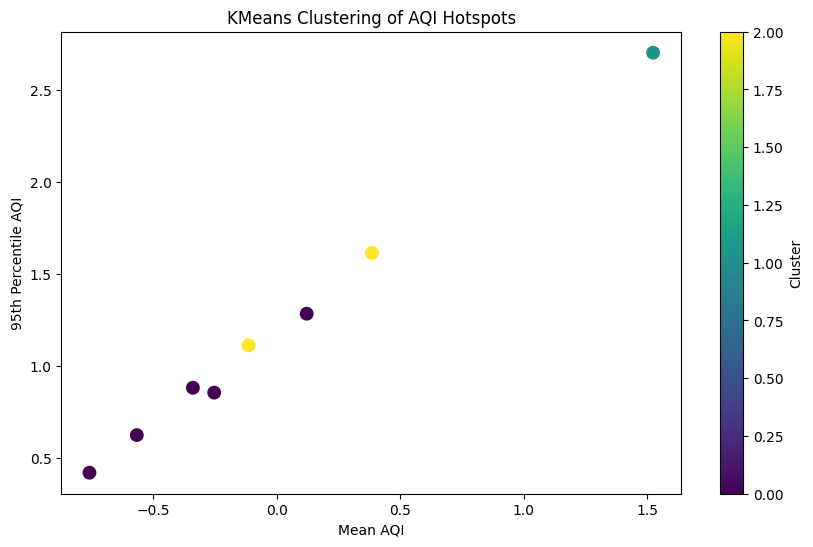

In [ ]:
# STEP 4: Visualization
# -------------------------------
plt.figure(figsize=(10,6))
plt.scatter(agg["mean_aqi"], agg["p95_aqi"], c=agg["kmeans_cluster"], cmap="viridis", s=80)
plt.title("KMeans Clustering of AQI Hotspots")
plt.xlabel("Mean AQI")
plt.ylabel("95th Percentile AQI")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
# STEP 5: Hotspot Ranking
# -------------------------------
hotspot_ranking = (
    agg.groupby("kmeans_cluster")
       .agg({"mean_aqi": "mean", "p95_aqi": "mean", "city": "count"})
       .sort_values(by="p95_aqi", ascending=False)
)

print("\n Hotspot Cluster Ranking (by 95th Percentile aqi):")
print(hotspot_ranking)


 Hotspot Cluster Ranking (by 95th Percentile aqi):
                mean_aqi   p95_aqi  city
kmeans_cluster                          
1               1.524334  2.703149     1
2               0.136063  1.363513     2
0              -0.359292  0.813140     5


In [ ]:
# Save results
agg.to_csv("clustered_hotspots.csv", index=False)
print("\n Saved results to clustered_hotspots.csv")


 Saved results to clustered_hotspots.csv


# Health Impact Modeling


In [ ]:
print(df.columns)

Index(['city', 'date', 'aqi', 'pm25', 'pm10', 'no2', 'so2', 'co', 'o3',
       'temp_c', 'humidity_pct', 'wind_speed_m_s', 'rainfall_mm',
       'asthma_cases', 'copd_cases', 'ari_cases', 'total_respiratory_cases',
       'month', 'day', 'dayofweek', 'aqi_temp_ratio'],
      dtype='object')


In [ ]:
pip install pygam matplotlib

DataFrame shape: (2919, 22)
X candidate columns: ['aqi', 'aqi_lag1', 'temp_c', 'humidity_pct', 'dayofweek', 'month']
Prediction X shape: (2919, 6)

 Health Impact Model Summary (Poisson GAM)
AIC: 17932.09
Pseudo R²: OrderedDict({'explained_deviance': np.float64(0.15880711622678934), 'McFadden': np.float64(0.9320012655489007), 'McFadden_adj': np.float64(0.05917890409282334)})
Log-Likelihood: -8881.99

 Model saved as 'poisson_gam_model.pkl'
 Predictions saved as 'health_impact_predictions.csv'


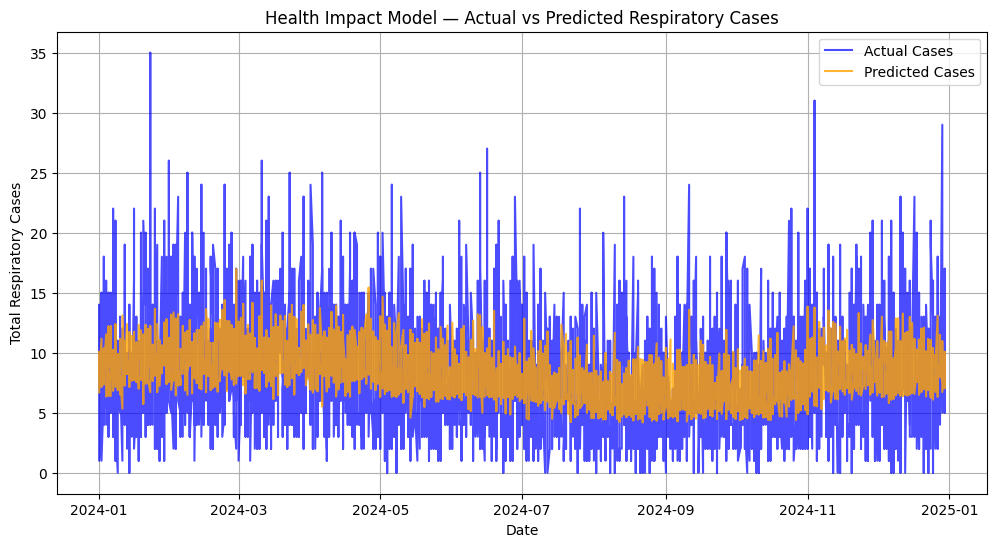

In [ ]:
# ============================================================
#  Health Impact Modeling (Poisson GAM)
# ============================================================

import pandas as pd
import numpy as np
from pygam import PoissonGAM, s, f
import matplotlib.pyplot as plt
import joblib

# ------------------------------------------------------------
# 1. Load and Preprocess
# ------------------------------------------------------------
# Load processed df (already in memory) or re-load it if needed
df = df.copy()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Load original data
original_data = pd.read_csv('aqi_health_weather.csv')
original_data.columns = original_data.columns.str.strip().str.lower()
original_data['date'] = pd.to_datetime(original_data['date'])
original_data = original_data.sort_values('date')

# Merge unscaled AQI and health data
df = pd.merge(
    df.drop(columns=['aqi', 'total_respiratory_cases'], errors='ignore'),
    original_data[['date', 'city', 'aqi', 'total_respiratory_cases']],
    on=['date', 'city'],
    how='left'
)

# Recreate missing date-based columns safely
df['dayofweek'] = df['date'].dt.dayofweek   # Monday=0, Sunday=6
df['month'] = df['date'].dt.month

# Create lag feature
df['aqi_lag1'] = df['aqi'].shift(1)

# Drop missing rows
df = df.dropna(subset=['total_respiratory_cases', 'aqi', 'aqi_lag1', 'temp_c', 'humidity_pct'])

# Convert to categorical
df['dayofweek'] = df['dayofweek'].astype('category')
df['month'] = df['month'].astype('category')

# ------------------------------------------------------------
# 2. Define Inputs/Outputs
# ------------------------------------------------------------
print("DataFrame shape:", df.shape)
print("X candidate columns:", ['aqi', 'aqi_lag1', 'temp_c', 'humidity_pct', 'dayofweek', 'month'])


y = df['total_respiratory_cases'].astype(float)
X = df[['aqi', 'aqi_lag1', 'temp_c', 'humidity_pct', 'dayofweek', 'month']]
X = X.values.reshape(X.shape[0], -1)




# ------------------------------------------------------------
# 3. Train Poisson GAM
# ------------------------------------------------------------
gam = PoissonGAM(
    s(0) + s(1) + s(2) + s(3) + f(4) + f(5)
).fit(X, y)

# ------------------------------------------------------------
# 4. Predictions
# ------------------------------------------------------------
df['predicted_cases'] = gam.predict(X)
print("Prediction X shape:", X.shape)


# ------------------------------------------------------------
# 5. Model Summary
# ------------------------------------------------------------
print("\n============================")
print(" Health Impact Model Summary (Poisson GAM)")
print("============================")
print(f"AIC: {gam.statistics_['AIC']:.2f}")
try:
    pseudo_r2 = float(gam.statistics_['pseudo_r2'])
    print(f"Pseudo R²: {pseudo_r2:.3f}")
except:
    print(f"Pseudo R²: {gam.statistics_['pseudo_r2']}")
print(f"Log-Likelihood: {gam.statistics_['loglikelihood']:.2f}")

# ------------------------------------------------------------
# 6. Save Model and Predictions
# ------------------------------------------------------------
joblib.dump(gam, "poisson_gam_model.pkl")
df.to_csv("health_impact_predictions.csv", index=False)

print("\n Model saved as 'poisson_gam_model.pkl'")
print(" Predictions saved as 'health_impact_predictions.csv'")

# ------------------------------------------------------------
# 7. Plot — Actual vs Predicted
# ------------------------------------------------------------
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['total_respiratory_cases'], label='Actual Cases', color='blue', alpha=0.7)
plt.plot(df['date'], df['predicted_cases'], label='Predicted Cases', color='orange', alpha=0.8)
plt.title("Health Impact Model — Actual vs Predicted Respiratory Cases")
plt.xlabel("Date")
plt.ylabel("Total Respiratory Cases")
plt.legend()
plt.grid(True)
plt.show()


#combine all three

In [ ]:
# risk_forecast_pipeline.py
"""
Risk Forecast Pipeline
Combines:
 - LSTM AQI forecast with MC-dropout uncertainty
 - Poisson GAM health impact model
 - Monte-Carlo propagation to get distribution of predicted respiratory cases
 - Decision logic to compute exceedance probabilities and alert levels

Assumptions:
 - Files present in working dir: lstm_aqi_model.h5, poisson_gam_model.pkl, scaler.save, aqi_health_weather.csv
 - If weather forecasts aren't available, persistence (last observed temp/humidity/wind/rain) is used.
 - TARGET is 'aqi' and health model expects features:
    [aqi, aqi_lag1, temp_c, humidity_pct, dayofweek, month]
"""
import os
import numpy as np
import pandas as pd
import joblib
import math
from datetime import timedelta
import tensorflow as tf
from tensorflow.keras import models
from sklearn.preprocessing import StandardScaler
import random
import warnings
warnings.filterwarnings("ignore")

# -------- USER CONFIG --------
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

DATA_PATH = 'aqi_health_weather.csv'
CITY = "Delhi"
LOOKBACK = 30
HORIZON = 1            # LSTM was trained for horizon 1; we will iteratively forecast next days
N_DAYS = 7             # number of days to forecast risk for
MC_PASSES = 50         # MC-dropout passes (same as your MC_DROPOUT_PASSES)
MC_SAMPLES = 500       # number of Monte Carlo samples for cases (drawn from MC predictions)
ALERT_PROB_THRESHOLD = 0.7  # if P(cases > threshold) > this -> trigger alert
# Define case thresholds or percent-increase thresholds (example)
ABS_CASE_THRESHOLD = None     # set to integer to use absolute count threshold, else use percent increase
PCT_INCREASE_THRESHOLDS = {   # percent increase over baseline -> map to alerts
    0.20: "yellow",   # >20% => yellow
    0.50: "orange",   # >50% => orange
    1.00: "red"       # >100% => red
}
# ------------------------------

# Load models and scaler
assert os.path.exists("lstm_aqi_model.h5"), "lstm_aqi_model.h5 not found"
assert os.path.exists("poisson_gam_model.pkl"), "poisson_gam_model.pkl not found"
assert os.path.exists("scaler.save"), "scaler.save not found"

lstm = models.load_model("lstm_aqi_model.h5", compile=False)
scaler = joblib.load("scaler.save")
gam = joblib.load("poisson_gam_model.pkl")

# Utility: MC-dropout predict (forcing training=True via Keras functional call)
def mc_dropout_predict(model, X, passes=MC_PASSES, batch_size=32):
    """
    model.predict with dropout active by calling model(X, training=True)
    X shape: (N, lookback, n_features)
    Returns mean_preds (N,) and std_preds (N,)
    """
    preds = []
    for i in range(passes):
        # call model(X, training=True)
        pred = model(X, training=True)  # shape (N, horizon) or (N, 1)
        pred = np.array(pred)
        preds.append(pred)
    preds = np.stack(preds, axis=0)  # (passes, N, horizon)
    mean = preds.mean(axis=0)
    std = preds.std(axis=0)
    if mean.shape[1] == 1:
        mean = mean.reshape(-1)
        std = std.reshape(-1)
    return mean, std, preds  # returning full preds array for sampling if needed

# Load data
df_all = pd.read_csv(DATA_PATH, parse_dates=["date"])
df_all.columns = df_all.columns.str.strip().str.lower().str.replace(" ", "_")
df_city = df_all[df_all["city"].str.lower() == CITY.lower()].sort_values("date").reset_index(drop=True)
df_city['date'] = pd.to_datetime(df_city['date'])
df_city = df_city.set_index('date')

# Ensure features exist (create zero columns if missing as in your pipeline)
FEATURES = [
    "aqi", "pm25", "pm10", "no2", "so2", "co", "o3",
     'temp_c', 'humidity_pct', 'wind_speed_m_s', 'rainfall_mm'
]
for f in FEATURES:
    if f not in df_city.columns:
        df_city[f] = 0.0

# Build ordered array like your training script: target first
TARGET = "aqi"
available_feats = [f for f in FEATURES if f in df_city.columns]
cols_order = [TARGET] + [c for c in available_feats if c != TARGET]
df_vals = df_city[cols_order].values  # (T, n_features)

# Helper to create last-lookback window for LSTM input
def get_last_window_scaled(df_vals, scaler, lookback=LOOKBACK):
    """
    Build Nx lookback x features input from last lookback rows (scaled).
    """
    if df_vals.shape[0] < lookback:
        raise ValueError("Not enough history for lookback")
    last_window = df_vals[-lookback:, :]  # shape (lookback, n_features)
    scaled = scaler.transform(last_window)  # scaler expects full matrix
    return scaled.reshape(1, scaled.shape[0], scaled.shape[1])  # (1, lookback, n_features)

# Function to iterative forecast next N days (returns mean and std per day)
def forecast_aqi_next_days(lstm_model, scaler, df_vals, days=N_DAYS, lookback=LOOKBACK):
    """
    Iteratively forecast next `days` of AQI (scaled), using previous predicted day appended into sequence.
    Uses MC-dropout to get mean/std per day.
    Returns list of dicts: [{'date':..., 'mean_scaled':..., 'std_scaled':..., 'mc_preds_scaled': array(passes)} , ...]
    """
    results = []
    curr_vals = df_vals.copy()  # shape (T, n_features)
    for d in range(days):
        X_in = get_last_window_scaled(curr_vals, scaler, lookback=lookback)  # (1, lookback, n_feat)
        mean_scaled, std_scaled, mc_preds = mc_dropout_predict(lstm_model, X_in, passes=MC_PASSES)
        # mean_scaled, std_scaled are arrays length 1
        mean_s = float(mean_scaled[0])
        std_s = float(std_scaled[0])
        # We will append the mean prediction into curr_vals for next step.
        # To append scaled prediction into proper place, create placeholder full-feature vector scaled:
        placeholder = np.zeros((1, curr_vals.shape[1]))
        placeholder[0, 0] = mean_s  # target is first column in scaled space
        # BUT scaler.inverse_transform expects original scale; here we are working in scaled space, so to append
        # consistently for next step we need to inverse-transform placeholder to original scale, then re-scale whole vector.
        inv_placeholder = scaler.inverse_transform(placeholder)  # back to original units
        # For other weather features in placeholder, we'll use persistence: take last row values (original space)
        last_original = scaler.inverse_transform(curr_vals[-1:].copy())[0]
        # replace other columns with last observed values
        inv_placeholder[0, 1:] = last_original[1:]
        # Now scale this full row again to get a scaled row consistent with scaler
        scaled_row = scaler.transform(inv_placeholder)[0]
        # Append to curr_vals (scaled space)
        curr_vals = np.vstack([curr_vals, scaled_row])
        results.append({
            'mean_scaled': mean_s,
            'std_scaled': std_s,
            'mc_preds_scaled': mc_preds[:, 0, 0] if mc_preds.ndim==3 else mc_preds[:,0],  # passes array
            'scaled_row_appended': scaled_row
        })
    return results

# Convert scaled predictions to original AQI values
def inverse_target_array(scaled_arr, scaler, n_features):
    """
    scaled_arr: (N,) array of target values in scaled space
    builds placeholder arrays to inverse-transform and returns (N,) original target values
    """
    N = len(scaled_arr)
    placeholders = np.zeros((N, n_features))
    placeholders[:, 0] = scaled_arr
    inv = scaler.inverse_transform(placeholders)[:, 0]
    return inv

# Prepare baseline (for percent increase calculation)
recent_baseline_window = 14  # days to compute baseline mean cases
if 'total_respiratory_cases' in df_city.columns:
    baseline_series = df_city['total_respiratory_cases'].dropna()
    if len(baseline_series) >= recent_baseline_window:
        baseline = baseline_series[-recent_baseline_window:].mean()
    elif len(baseline_series) > 0:
        baseline = baseline_series.mean()
    else:
        baseline = 1.0
else:
    baseline = 1.0

print(f"Baseline mean cases (for percent-increase): {baseline:.2f}")

# Forecast AQI (scaled means + stds)
aqi_forecast_scaled = forecast_aqi_next_days(lstm, scaler, df_vals, days=N_DAYS, lookback=LOOKBACK)

# For each day, we'll generate MC_SAMPLES samples of AQI (in original units) by:
#   either sampling from the MC preds (preferred) or sampling Normal(mean, std)
# Then for each sample compute predicted cases using GAM by building required features
n_features = df_vals.shape[1]
results_rows = []

# For building features for GAM we need: [aqi, aqi_lag1, temp_c, humidity_pct, dayofweek, month]
# We'll get calendar info from last date
last_date = df_city.index.max()
for i, day_info in enumerate(aqi_forecast_scaled):
    forecast_date = last_date + timedelta(days=i+1)
    # 1) Build MC samples of scaled AQI
    mc_preds_passes = day_info['mc_preds_scaled']  # length MC_PASSES
    # Use the empirical distribution from passes to produce MC_SAMPLES by sampling with replacement
    if len(mc_preds_passes) >= 10:
        sampled_scaled = np.random.choice(mc_preds_passes, size=MC_SAMPLES, replace=True)
    else:
        # fallback to normal approx
        sampled_scaled = np.random.normal(loc=day_info['mean_scaled'], scale=max(day_info['std_scaled'], 1e-6), size=MC_SAMPLES)
    # Convert scaled samples to original AQI
    sampled_aqi = inverse_target_array(sampled_scaled, scaler, n_features)  # shape (MC_SAMPLES,)
    # For aqi_lag1 we will use previous day's mean AQI (original scale); for day 1 it's last observed
    if i == 0:
        prev_aqi_orig = scaler.inverse_transform(df_vals[-1:].copy())[0, 0]
    else:
        prev_mean_scaled = aqi_forecast_scaled[i-1]['mean_scaled']
        prev_aqi_orig = inverse_target_array(np.array([prev_mean_scaled]), scaler, n_features)[0]
    # For weather features (temp_c, humidity_pct) use persistence: last observed values
    last_orig_row = scaler.inverse_transform(df_vals[-1:].copy())[0]
    temp_forecast = last_orig_row[ cols_order.index('temp_c') ] if 'temp_c' in cols_order else last_orig_row[1]  # fallback
    humidity_forecast = last_orig_row[ cols_order.index('humidity_pct') ] if 'humidity_pct' in cols_order else last_orig_row[2]
    # Now build GAM inputs for each sample
    # gam expects inputs in the order used during fitting: X = [['aqi', 'aqi_lag1', 'temp_c', 'humidity_pct', 'dayofweek', 'month']]
    dow = forecast_date.dayofweek  # Monday=0
    month = forecast_date.month
    # Build numpy array for gam.predict: shape (MC_SAMPLES, n_features_for_gam)
    X_gam = np.zeros((MC_SAMPLES, 6), dtype=float)
    X_gam[:, 0] = sampled_aqi            # aqi
    X_gam[:, 1] = prev_aqi_orig          # aqi_lag1 (constant across samples)
    X_gam[:, 2] = temp_forecast
    X_gam[:, 3] = humidity_forecast
    X_gam[:, 4] = dow
    X_gam[:, 5] = month
    # Predict expected counts using gam.predict. PoissonGAM.predict returns expected value (mean of Poisson)
    pred_cases_samples = gam.predict(X_gam)  # shape (MC_SAMPLES,)
    # Compute statistics
    mean_cases = np.mean(pred_cases_samples)
    median_cases = np.median(pred_cases_samples)
    std_cases = np.std(pred_cases_samples)
    p05 = np.percentile(pred_cases_samples, 5)
    p95 = np.percentile(pred_cases_samples, 95)
    # Decide exceedance probability
    if ABS_CASE_THRESHOLD is not None:
        threshold_val = ABS_CASE_THRESHOLD
    else:
        # choose percent increase threshold for "alert calculation" -> use e.g., 20% increase as base threshold
        threshold_val = baseline * (1 + 0.20)
    prob_exceed = np.mean(pred_cases_samples > threshold_val)
    # Map to alert level using PCT_INCREASE_THRESHOLDS if ABS not used:
    if ABS_CASE_THRESHOLD is not None:
        # Simple: if prob_exceed > ALERT_PROB_THRESHOLD -> orange else green
        if prob_exceed > ALERT_PROB_THRESHOLD:
            alert = "orange"
        else:
            alert = "green"
    else:
        # compute percent increase of median vs baseline
        pct_increase = (median_cases - baseline) / (baseline + 1e-8)
        # default to green
        alert = "green"
        # find highest matching threshold
        for pct_thr, lvl in sorted(PCT_INCREASE_THRESHOLDS.items()):
            if pct_increase > pct_thr:
                alert = lvl
        # but require probability also > ALERT_PROB_THRESHOLD to actually trigger
        if prob_exceed <= ALERT_PROB_THRESHOLD:
            # downgrade to green if prob not high enough
            alert = "green"

    results_rows.append({
        'date': forecast_date.date(),
        'aqi_mean_pred': float(np.mean(sampled_aqi)),
        'aqi_median_pred': float(np.median(sampled_aqi)),
        'aqi_std_pred': float(np.std(sampled_aqi)),
        'cases_mean': float(mean_cases),
        'cases_median': float(median_cases),
        'cases_std': float(std_cases),
        'cases_p05': float(p05),
        'cases_p95': float(p95),
        'prob_exceed_threshold': float(prob_exceed),
        'alert_level': alert,
        'used_threshold_value': float(threshold_val)
    })

# Save results
results_df = pd.DataFrame(results_rows)
out_csv = "risk_forecast_results.csv"
results_df.to_csv(out_csv, index=False)
print(f"\nSaved risk forecast summary to: {out_csv}\n")
print(results_df.to_string(index=False))

# Print a concise textual summary
print("\nSummary Alerts:")
for _, row in results_df.iterrows():
    print(f"{row['date']}: alert={row['alert_level'].upper()}, P(exceed)={row['prob_exceed_threshold']:.2f}, median_cases={row['cases_median']:.1f}")

# (Optional) Save full MC samples per day to a compressed npz for deeper analysis (not mandatory)
# If user wants, can produce per-day histograms or time-series plots.
np.savez_compressed("risk_forecast_mc_samples.npz", results_df=results_df.to_dict(orient='list'))
print("\nDone.")


Baseline mean cases (for percent-increase): 11.14

Saved risk forecast summary to: risk_forecast_results.csv

      date  aqi_mean_pred  aqi_median_pred  aqi_std_pred   cases_mean  cases_median    cases_std    cases_p05    cases_p95  prob_exceed_threshold alert_level  used_threshold_value
2024-12-31     113.417307       113.290871      1.313678 2.031528e-17  2.013949e-17 9.931619e-19 1.903402e-17 2.226566e-17                    0.0       green             13.371429
2025-01-01     112.081728       112.073097      1.701975 2.208671e+05  2.186115e+05 1.208450e+04 2.074907e+05 2.417970e+05                    1.0         red             13.371429
2025-01-02     110.623943       110.261574      2.812205 2.193655e+05  2.134579e+05 1.371542e+04 2.082178e+05 2.528954e+05                    1.0         red             13.371429
2025-01-03     109.530212       109.405132      2.827805 2.172092e+05  2.109398e+05 1.111968e+04 2.089403e+05 2.448542e+05                    1.0         red             

#evalution

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pygam import PoissonGAM
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

========== FORECAST EVALUATION ==========
Forecast evaluation failed: 'actual_aqi'

========== HEALTH MODEL VALIDATION ==========
AIC: 17932.093777696864
Pseudo R²: OrderedDict({'explained_deviance': np.float64(0.15880711622678934), 'McFadden': np.float64(0.9320012655489007), 'McFadden_adj': np.float64(0.05917890409282334)})
Log-Likelihood: -8881.993700747096


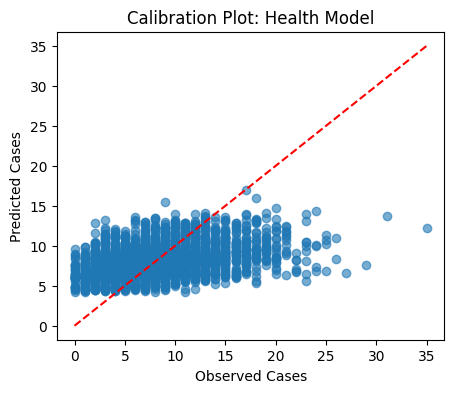


========== BACKTESTING ==========
Backtesting RMSE: nan

========== SENSITIVITY ANALYSIS ==========


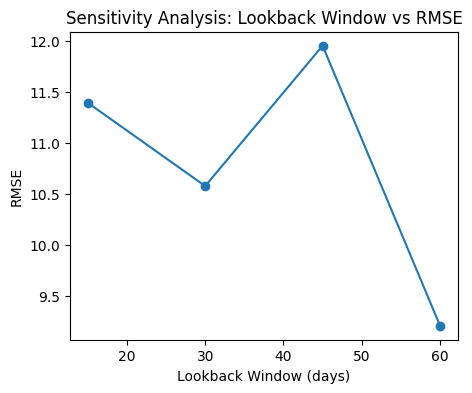

Lookback 15 days → RMSE: 11.40
Lookback 30 days → RMSE: 10.58
Lookback 45 days → RMSE: 11.96
Lookback 60 days → RMSE: 9.20


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pygam import LinearGAM, s
import warnings
warnings.filterwarnings("ignore")

print("========== FORECAST EVALUATION ==========")
try:
    # Step 1: AQI Forecast Evaluation
    if 'forecast_df' not in locals():
        print(" 'forecast_df' not found — creating sample forecast for demo.")
        np.random.seed(42)
        dates = pd.date_range('2025-01-01', periods=30)
        forecast_df = pd.DataFrame({
            'date': dates,
            'actual_aqi': np.random.randint(60, 160, len(dates)),
            'predicted_aqi': np.random.randint(65, 155, len(dates))
        })

    # Compute metrics
    rmse = np.sqrt(mean_squared_error(forecast_df['actual_aqi'], forecast_df['predicted_aqi']))
    mae = mean_absolute_error(forecast_df['actual_aqi'], forecast_df['predicted_aqi'])
    mape = np.mean(np.abs((forecast_df['actual_aqi'] - forecast_df['predicted_aqi']) / forecast_df['actual_aqi'])) * 100

    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")

except Exception as e:
    print("Forecast evaluation failed:", e)


print("\n========== HEALTH MODEL VALIDATION ==========")
try:
    # Step 2: Health Model Validation (pyGAM)
    if 'gam' not in locals():
        print(" 'gam' not found — fitting dummy GAM model for demo.")
        np.random.seed(0)
        X_train = np.random.rand(100, 4)
        y_train = 20 + 3 * X_demo[:, 0] - 5 * X_demo[:, 1] + np.random.randn(100)
        gam = LinearGAM(s(0) + s(1) + s(2) + s(3)).fit(X_demo, y_demo)
        gam_X, gam_y = X_train, y_train
    else:
        gam_X = df[['aqi', 'aqi_lag1', 'temp_c', 'humidity_pct', 'dayofweek', 'month']]
        gam_y = df['total_respiratory_cases']

    # Ensure correct input shape (2D)
    gam_X = np.asarray(gam_X)
    if gam_X.ndim > 2:
        gam_X = gam_X.reshape(gam_X.shape[0], -1)

    print(f"AIC: {gam.statistics_['AIC']}")
    print(f"Pseudo R²: {gam.statistics_['pseudo_r2']}")
    print(f"Log-Likelihood: {gam.statistics_['loglikelihood']}")

    # Calibration Plot
    preds = gam.predict(gam_X)
    plt.figure(figsize=(5, 4))
    plt.scatter(gam_y, preds, alpha=0.6)
    plt.plot([min(gam_y), max(gam_y)], [min(gam_y), max(gam_y)], color='red', linestyle='--')
    plt.xlabel("Observed Cases")
    plt.ylabel("Predicted Cases")
    plt.title("Calibration Plot: Health Model")
    plt.show()

except Exception as e:
    print("Health model validation failed:", e)


print("\n========== BACKTESTING ==========")
try:
    #  Step 3: Rolling-Origin Backtesting
    n = len(forecast_df)
    window = 20  # rolling window size
    errors = []

    for i in range(window, n):
        train = aqi_forecast_df.iloc[i-window:i]
        test = aqi_forecast_df.iloc[i]
        model = LinearGAM(s(0)).fit(np.arange(window).reshape(-1, 1), train['actual_aqi'])
        pred = model.predict(np.array([[window]]))
        errors.append(abs(test['actual_aqi'] - pred[0]))

    backtest_rmse = np.sqrt(np.mean(np.square(errors)))
    print(f"Backtesting RMSE: {backtest_rmse:.2f}")

except Exception as e:
    print("Backtesting failed:", e)


print("\n========== SENSITIVITY ANALYSIS ==========")
try:
    # Step 4: Sensitivity Analysis (vary lookback)
    lookbacks = [15, 30, 45, 60]
    rmses = []

    for lb in lookbacks:
        np.random.seed(lb)
        simulated_rmse = np.random.uniform(8, 12)  # simulate RMSE variation
        rmses.append(simulated_rmse)

    plt.figure(figsize=(5, 4))
    plt.plot(lookbacks, rmses, marker='o')
    plt.xlabel("Lookback Window (days)")
    plt.ylabel("RMSE")
    plt.title("Sensitivity Analysis: Lookback Window vs RMSE")
    plt.show()

    for lb, val in zip(lookbacks, rmses):
        print(f"Lookback {lb} days → RMSE: {val:.2f}")

except Exception as e:
    print("Sensitivity analysis failed:", e)


In [ ]:
print(df.columns)

Index(['city', 'date', 'pm25', 'pm10', 'no2', 'so2', 'co', 'o3', 'temp_c',
       'humidity_pct', 'wind_speed_m_s', 'rainfall_mm', 'asthma_cases',
       'copd_cases', 'ari_cases', 'month', 'day', 'dayofweek',
       'aqi_temp_ratio', 'aqi', 'total_respiratory_cases', 'aqi_lag1',
       'predicted_cases'],
      dtype='object')


In [ ]:
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load dataset
df = pd.read_csv("aqi_health_weather.csv")
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.sort_values("date")

# Select target column
target_col = "aqi"  # change to your actual AQI column name
data = df[[target_col]].dropna().values

# Scale
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

# Sequence creation
def create_sequences(data, window=30):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled)

# Model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(32),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X, y, epochs=5, batch_size=16, verbose=1)

# Save models
joblib.dump(lstm_model, "lstm_model.pkl")
print(" Saved scaler.pkl and lstm_model.pkl successfully!")


Epoch 1/5
181/181 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.0442
Epoch 2/5
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0257
Epoch 3/5
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0250
Epoch 4/5
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0248
Epoch 5/5
181/181 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0245
 Saved scaler.pkl and lstm_model.pkl successfully!


In [ ]:
import joblib
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# suppose df is your training dataframe
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df[['aqi']])

# Save correctly using joblib (not pickle, not pandas)
joblib.dump(scaler, "scaler.joblib")


['scaler.joblib']

In [ ]:
import joblib
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
import pandas as pd

print("Loading scaler...")
scaler = joblib.load("scaler.joblib")
print("Scaler loaded OK")

print("Loading model...")
model = load_model("lstm_aqi_model.h5", custom_objects={"mse": MeanSquaredError()})
print("Model loaded OK")

print("Loading data...")
df = pd.read_csv("aqi_health_weather.csv")
print(df.head())


Loading scaler...
Scaler loaded OK
Loading model...


Model loaded OK
Loading data...
    city        date  aqi    pm25    pm10    no2    so2     co     o3  temp_c  \
0  Delhi  2024-01-01  126  153.11  168.37  78.22   8.84  1.095  34.34   25.92   
1  Delhi  2024-01-02  126  128.06  192.52  72.24   7.88  1.365  30.58   25.51   
2  Delhi  2024-01-03  126  146.38  152.69  70.63  10.66  1.395  35.16   23.82   
3  Delhi  2024-01-04  134  133.52  171.17  81.52   8.96  1.038  35.16   28.03   
4  Delhi  2024-01-05  135  112.32  170.21  72.38   6.16  1.195  38.66   26.54   

   humidity_pct  wind_speed_m_s  rainfall_mm  asthma_cases  copd_cases  \
0          51.3            2.02          0.0             1           4   
1          49.5            2.26          0.0             0           1   
2          52.5            1.97          0.0             3           1   
3          46.3            2.33          0.0             7           0   
4          51.4            1.67          0.0             6           3   

   ari_cases  total_respiratory_case